# MNIST - Softmax Regression Approach

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [6]:
mnist.train.num_examples

55000

In [7]:
mnist.test.num_examples

10000

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
single_image = mnist.train.images[1].reshape(28, 28) 

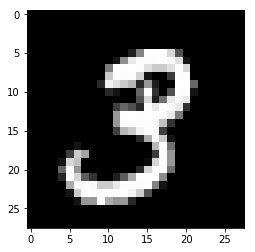

In [10]:
plt.imshow(single_image, cmap = 'gist_gray') # Visualizing image number 1

## The data is already normalized

In [11]:
single_image.min()

0.0

In [12]:
single_image.max()

1.0

## Now that we've the data, we can go ahead and create our model

### We need to create the placeholders, variables, graph operations, loss function, an optimizer and finally create a session

In [13]:
# Placeholder
x = tf.placeholder(tf.float32, shape = [None, 784])

In [14]:
# Variables
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [15]:
# Creating graph operations
y = tf.matmul(x, W) + b

In [16]:
# Loss function
y_true = tf.placeholder(tf.float32, [None, 10]) # None because, it is going to be our mini-batch size

In [17]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y_true, logits = y))

In [18]:
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cross_entropy)

In [19]:
# Create Session 
init  = tf.global_variables_initializer()

In [20]:
with tf.Session() as sess:
    
    sess.run(init)
    
    for step in range(100000):
        
        batch_x, batch_y = mnist.train.next_batch(128)
        
        sess.run(train, feed_dict = {x : batch_x, y_true : batch_y})
        
    # To evaluate the model
    correct_pred = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))
    
    # Now to cast the boolean into floating point numbers of probability
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    
    print(sess.run(accuracy, feed_dict = {x : mnist.test.images, y_true : mnist.test.labels}))
            

0.9229


# Conclusion : The model was able to get an accuracy of 92.38%